## Data-Preprocessing

### 1. Importing Necessary Libraries and Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa = pd.read_csv('D:/PGPDSE/Exploratory Data Analysis/EDA Mini-Project/fifa.csv')
display(fifa.head())

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
fifa.shape

(18207, 60)

In [4]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [5]:
print(fifa.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [6]:
fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
Crossing                       48
Finishing                      48
HeadingAccuracy                48
ShortPassing                   48
Volleys       

In [7]:
fifa = fifa.drop(['Photo', 'Flag', 'Club Logo', 'Jersey Number', 'Loaned From'], axis = 1)

### 3. Converting required columns into relevant datatypes after extracting useful info from them

#### Treating Value and Wage Columns

In [8]:
display(fifa[['Value', 'Wage']].head())

,Value,Wage
0,€110.5M,€565K
1,€77M,€405K
2,€118.5M,€290K
3,€72M,€260K
4,€102M,€355K


In [9]:
def extract(x):
    if x is not np.nan:
        last = x[-1]
        if last == 'M':
            num = float(x.lstrip('€').rstrip('M')) * 1000000
        else:
            num = float(x.lstrip('€').rstrip('K')) * 1000
        return(num)

In [10]:
fifa['Value'] = fifa['Value'].apply(lambda x: extract(x)).astype(float)

In [11]:
fifa['Wage'] = fifa['Wage'].apply(lambda x: extract(x)).astype(float)

In [12]:
#Checking Value and Wage Columns after the process
display(fifa[['Value', 'Wage']].head())

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0


#### Treating Joined Column

In [13]:
display(fifa['Joined'].head())

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [14]:
fifa['Joined'] = fifa['Joined'].str.split(', ').str[1]
fifa['Joined'] = fifa['Joined'].astype(float)
display(fifa['Joined'].head())

0    2004.0
1    2018.0
2    2017.0
3    2011.0
4    2015.0
Name: Joined, dtype: float64

#### Treating Contract Valid Until Column

In [15]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])
display(fifa['Contract Valid Until'].head())

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

#### Treating Height and Weight Columns

In [16]:
display(fifa[['Height', 'Weight']].head())

,Height,Weight
0,5'7,159lbs
1,6'2,183lbs
2,5'9,150lbs
3,6'4,168lbs
4,5'11,154lbs


In [17]:
fifa['Height'] = fifa['Height'].str.replace("'", ".").astype(float)
fifa['Weight'] = fifa['Weight'].str.rstrip('lbs').astype(float)
display(fifa[['Height', 'Weight']].head())

,Height,Weight
0,5.70,159.0
1,6.20,183.0
2,5.90,150.0
3,6.40,168.0
4,5.11,154.0


#### Treating Release Clause Column

In [18]:
display(fifa['Release Clause'].head())

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [19]:
fifa['Release Clause'] = fifa['Release Clause'].apply(lambda x: extract(x)).astype(float)

In [20]:
display(fifa['Release Clause'].head())

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release Clause, dtype: float64

### 4. Filling Missing Values

##### There are 241 players who are not associated with any club, so we will fill the missing values of columns related to club accordingly

#### Filling Values Column as necessary

In [21]:
fifa.loc[(fifa.Value == 0) & (fifa.Club.isna() == False), 'Value'] = fifa['Value'].mean()

#### Imputing Joined, Contract Valid Until and Release Clause Columns

In [22]:
fifa.loc[(fifa.Joined.isna() == True) & (fifa.Club.isna() == False), 'Joined'] = np.random.choice(fifa.Joined)

In [23]:
fifa.loc[(fifa['Contract Valid Until'].isna() == True) & (fifa.Club.isna() == False), 'Contract Valid Until'] = np.random.choice(fifa['Contract Valid Until'])

In [24]:
fifa.loc[(fifa['Release Clause'].isna() == True) & (fifa.Club.isna() == False), 'Release Clause'].fillna(fifa['Release Clause'].mean(), inplace = True)

#### Preferred Foot, Weak Foot, Skill Moves and Position imputed with random Values in the same probability distribution as given in the respective columns

In [25]:
for i in ['Preferred Foot', 'Weak Foot', 'Skill Moves', 'Position']:
    vc = fifa[i].value_counts(normalize = True)
    miss = fifa[i].isna()
    fifa.loc[miss, i] = np.random.choice(vc.index, size = miss.sum(), p = vc.values)

#### Interntional Reputation, Work Rate, Body Type imputed with mode values

In [26]:
for i in ['International Reputation', 'Work Rate', 'Body Type']:
    fifa[i].fillna(fifa[i].mode()[0], inplace = True)

#### Columns from Height to Release Clause imputed with mean

In [27]:
for i in ['Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']:
    fifa[i].fillna(fifa[i].mean(), inplace = True)

## Exploratory Analysis

### 1. The distribution of Overall rating for all players. 

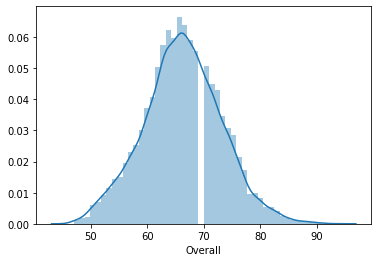

In [28]:
sns.distplot(fifa.Overall)
plt.savefig('Dist_Overall', dpi = 500)
plt.show()

### 2. Pair plots for the following variables:
Overall, Value, Wage, International Reputation, Height, Weight, Release Clause


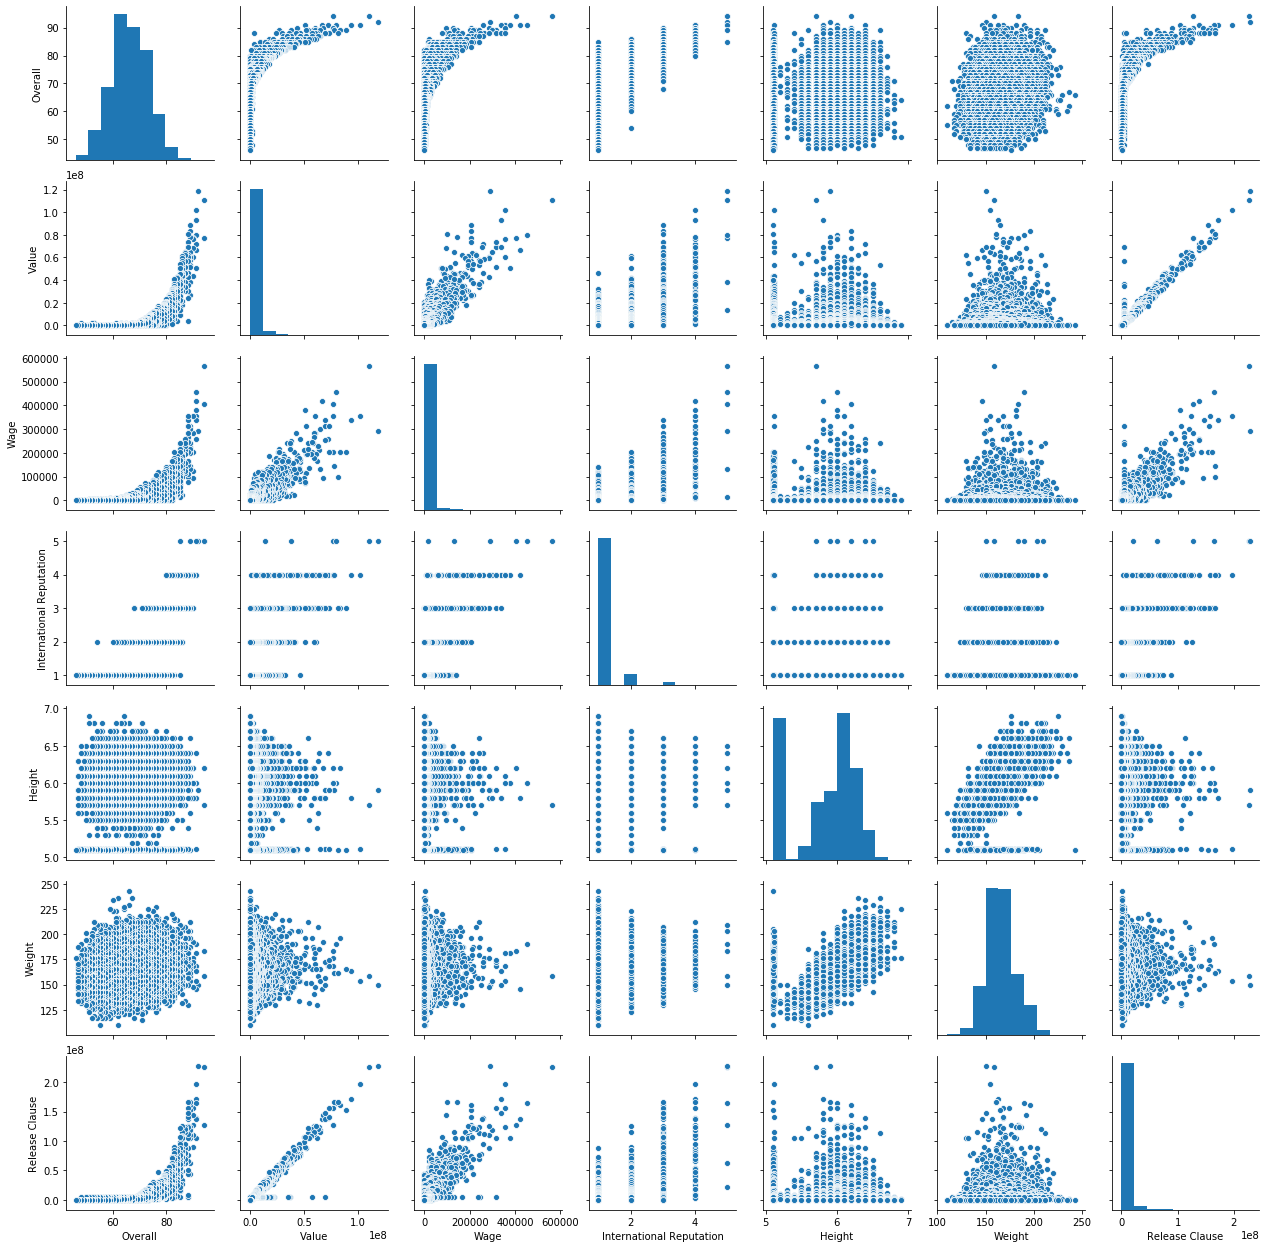

In [29]:
sns.pairplot(fifa[['Overall', 'Value', 'Wage', 'International Reputation', 'Height', 'Weight', 'Release Clause']])
plt.savefig('paiplot-fifa', dpi = 1000)
plt.show()

### 3. A table containing the top 20 players ranked by Overall score whose contract expires in 2020

In [30]:
table = fifa[fifa['Contract Valid Until'].dt.year == 2020].sort_values('Overall', ascending = False).head(20)

In [31]:
display(table[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Body Type', 'Position', 'Joined', 'Contract Valid Until']])

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until
3,193080,De Gea,27,Spain,91,Manchester United,72000000.0,260000.0,Right,4.0,Lean,GK,2011.0,2020-01-01
6,177003,L. Modrić,32,Croatia,91,Real Madrid,67000000.0,420000.0,Right,4.0,Lean,RCM,2012.0,2020-01-01
8,155862,Sergio Ramos,32,Spain,91,Real Madrid,51000000.0,380000.0,Right,4.0,Normal,RCB,2005.0,2020-01-01
5,183277,E. Hazard,27,Belgium,91,Chelsea,93000000.0,340000.0,Right,4.0,Normal,LF,2012.0,2020-01-01
13,168542,David Silva,32,Spain,90,Manchester City,60000000.0,285000.0,Left,4.0,Normal,LCM,2010.0,2020-01-01
21,179813,E. Cavani,31,Uruguay,89,Paris Saint-Germain,60000000.0,200000.0,Right,4.0,Lean,LS,2013.0,2020-01-01
24,138956,G. Chiellini,33,Italy,89,Juventus,27000000.0,215000.0,Left,4.0,Normal,LCB,2005.0,2020-01-01
31,190460,C. Eriksen,26,Denmark,88,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,Lean,CAM,2013.0,2020-01-01
39,164240,Thiago Silva,33,Brazil,88,Paris Saint-Germain,24000000.0,165000.0,Right,4.0,Normal,RCB,2012.0,2020-01-01
50,175943,D. Mertens,31,Belgium,87,Napoli,45000000.0,135000.0,Right,3.0,Normal,RF,2013.0,2020-01-01


#### a) the average wage for this set of players

In [32]:
print(table['Wage'].mean())

205450.0


#### b) The Average Age

In [33]:
print(table['Age'].mean())

30.65


#### c) correlation between the Overall rating and Value for these players

In [34]:
print(fifa[['Overall', 'Value']].corr())

         Overall    Value
Overall  1.00000  0.62695
Value    0.62695  1.00000


##### Yes There is a correlation of 0.627 between Overall Rating and Value of these Players

### 4. Table containing the top 5 players by Overall rating for each unique position

In [35]:
table = fifa.groupby('Position').apply(lambda x: x.sort_values('Overall', ascending = False)).reset_index(drop = True)

In [36]:
table_final = table.groupby('Position').head(5)

In [37]:
display(table_final[['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Club', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Body Type', 'Position', 'Joined', 'Contract Valid Until']])

,ID,Name,Age,Nationality,Overall,Club,Value,Wage,Preferred Foot,International Reputation,Body Type,Position,Joined,Contract Valid Until
0,194765,A. Griezmann,27,France,89,Atlético Madrid,78000000.0,145000.0,Left,4.0,Lean,CAM,2014.0,2023-01-01
1,190460,C. Eriksen,26,Denmark,88,Tottenham Hotspur,73500000.0,205000.0,Right,3.0,Lean,CAM,2013.0,2020-01-01
2,201942,Roberto Firmino,26,Brazil,86,Liverpool,53000000.0,195000.0,Right,3.0,Lean,CAM,2015.0,2023-01-01
3,176635,M. Özil,29,Germany,86,Arsenal,43500000.0,190000.0,Left,4.0,Lean,CAM,2013.0,2021-01-01
4,189596,T. Müller,28,Germany,86,FC Bayern München,45000000.0,135000.0,Right,4.0,Lean,CAM,2008.0,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16044,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,77000000.0,405000.0,Right,5.0,C. Ronaldo,ST,2018.0,2022-01-01
16045,188545,R. Lewandowski,29,Poland,90,FC Bayern München,77000000.0,205000.0,Right,4.0,Normal,ST,2014.0,2021-01-01
16046,202126,H. Kane,24,England,89,Tottenham Hotspur,83500000.0,205000.0,Right,3.0,Normal,ST,2010.0,2024-01-01
16047,153079,S. Agüero,30,Argentina,89,Manchester City,64500000.0,300000.0,Right,4.0,Stocky,ST,2011.0,2021-01-01


#### a)	Are there any players appearing in more than one Table? 

In [38]:
table_final['Name'].value_counts().values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int64)

##### As we can see the value counts for each player is 1, so we can say that no player appear in more than 1 position.

#### b) the average wage one can expect to pay for the top 5 in every position

In [39]:
print(table_final.groupby('Position')['Wage'].mean())

Position
CAM    174000.0
CB     139600.0
CDM    217000.0
CF      47400.0
CM     130600.0
GK     192800.0
LAM     81600.0
LB     177200.0
LCB    162000.0
LCM    184400.0
LDM    126600.0
LF     121200.0
LM     164600.0
LS     130200.0
LW     261000.0
LWB     34200.0
RAM     45400.0
RB     155400.0
RCB    231000.0
RCM    240800.0
RDM    105000.0
RF     148000.0
RM     131400.0
RS     132200.0
RW     202000.0
RWB     44200.0
ST     294000.0
Name: Wage, dtype: float64
